In [1]:
# Written by Chetan Mandloi (VU3ULH)
# Importing the required libraries
import pandas as pd                        # For dataframes, reading html 
import matplotlib.pyplot as plt            # For Plotting

In [2]:
#Get current Delegate list from hamfest website
#Please use higher end number in the url in registered candidates go over 1500
hams = pd.read_html('http://www.hamfestindia2018.com/Delegates/List?start=0&end=1500')[0]

In [3]:
#hams

In [4]:
#Just formatting the dataframe properly
hams = hams.rename(columns=hams.iloc[0])
hams = hams.drop([0])
#hams

In [5]:
#hams['Gender']

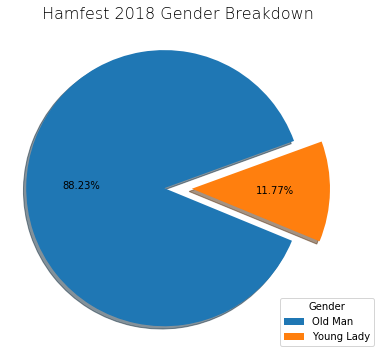

In [6]:
# Pie Chart Showing gender breakdown
gend = hams['Gender'].value_counts()
fig1,ax1 = plt.subplots()
ax1.pie(gend, explode = (0,0.2), autopct='%1.2f%%',
       shadow = True, startangle = 20)
ax1.legend(('Old Man','Young Lady'),title ='Gender', loc = 'lower right',bbox_to_anchor = (1,0,0.1,1))
ax1.axis('equal')
fig1.set_figheight(6)
fig1.set_figwidth(6)
plt.title("Hamfest 2018 Gender Breakdown", fontdict= {'fontsize': 16,
                                     'fontweight' : 5,
                                     'verticalalignment': 'baseline','horizontalalignment': 'center'})
plt.show()

In [7]:
# Correcting all the various conflicting state names,
# You might think why I didn't just convert everything to same case but just case correction
# would not have fixed other errors like spelling mistakes, and improper state names like
# people who made typos like tamilandu, TN, Gujrat etc
#
# NOTE SOME ENTRIES IN THE BEGINING ARE NaN. THESE ARE BEING IGNORED
#
refined_hams = hams['State'].replace(["Dharwad", "Tamilnadu","KARNATAKA","karnataka","KERALA","ANDHRA PRADESH","TAMIL NADU",
                                      "TAMILNADU","Telengana","GUJRAT","GUJARAT","MAHARASHTRA","WEST BENGAL",
                                     "ANDHRAPRADESH","TELANGANA","KERALA STATE","Tamil nadu","Maharastra","KARANTAKA",
                                      "kerala","tamil nadu","KARANATAKA","Andhrapradesh","Tamilandu","KARANATKA",
                                     "TN","Tamilnadu ,Trichy 620004.","ODISHA",'MAHARASTRA','ANDRA PRADESH',
                                     "MANGALAPURAM ROAD","Near Kerala Govt. NGO Quarters",'UTTAR PRADESH','DELHI',"Gujrat",
                                     "Near Grindwell Norton","telangana",'BIHAR',"Maharasatra","New Delhi","Maharastra"],
                      ["Karnataka", "Tamil Nadu","Karnataka","Karnataka","Kerala","Andhra Pradesh","Tamil Nadu",
                       "Tamil Nadu","Telangana","Gujarat","Gujarat","Maharastra","West Bengal",
                      "Andhra Pradesh","Telangana","Kerala","Tamil Nadu","Maharastra","Karnataka",
                       "Kerala","Tamil Nadu", "Karnataka","Andhra Pradesh","Tamil Nadu","Karnataka",
                       "Tamil Nadu","Tamil Nadu","Odisha","Maharastra","Andhra Pradesh",
                       "Kerala","Kerala",'Uttar Pradesh',"Delhi","Gujarat",
                       "Karnataka","Telangana",'Bihar',"Maharastra","Delhi","Maharashtra"
                      ])
#refined_hams

In [8]:
states = refined_hams.value_counts()
states

Karnataka         688
Kerala            161
Tamil Nadu        160
Maharashtra        77
Andhra Pradesh     71
Telangana          32
Gujarat            26
West Bengal        23
Bihar               8
USA                 7
Uttar Pradesh       6
Rajasthan           5
Puducherry          3
Delhi               3
Jharkhand           3
Assam               3
Goa                 2
Odisha              2
ONTARIO             2
Haryana             1
Manipur             1
Chicago             1
Doha                1
Tripura             1
Madhya Pradesh      1
Chhattisgarh        1
India               1
Name: State, dtype: int64

In [9]:
major_states = states[:9]
major_states["Others"]= states[9:].sum()
#major_states.index

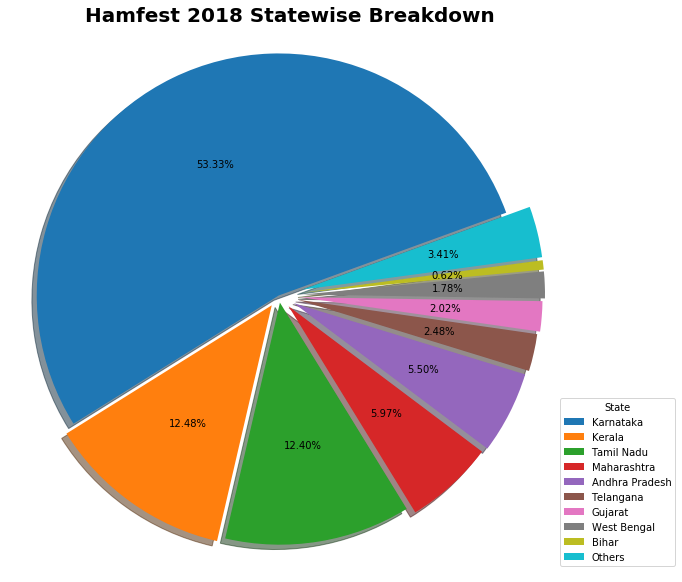

In [10]:
# Pie Chart Showing statewide distribution
fig1,ax1 = plt.subplots()
ax1.pie(major_states, explode = (0,0.05,0.03,0.06,0.07,0.08,0.09,0.1,0.1,0.1), autopct='%1.2f%%',
       shadow = True, startangle = 20)
ax1.legend(major_states.index,title ='State', loc = 'lower right',bbox_to_anchor = (1.1,0,0.1,6))
ax1.axis('equal')
fig1.set_figheight(10)
fig1.set_figwidth(10)
plt.title("Hamfest 2018 Statewise Breakdown", fontdict= {'fontsize': 20,
                                     'fontweight' : 1000,
                                     'verticalalignment': 'baseline','horizontalalignment': 'center'})
plt.show()

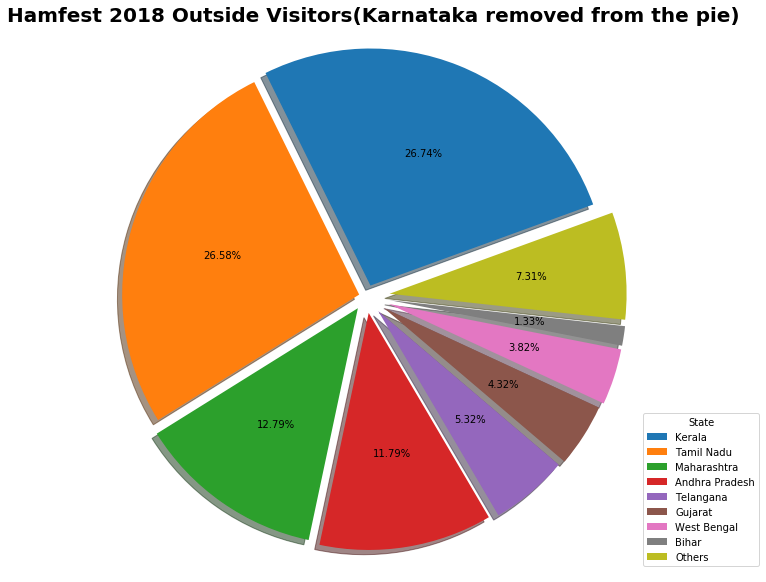

In [11]:
# Pie Chart Showing statewide distribution
fig1,ax1 = plt.subplots()
ax1.pie(major_states[1:], explode = (0.05,0.03,0.06,0.07,0.08,0.09,0.1,0.1,0.1), autopct='%1.2f%%',
       shadow = True, startangle = 20)
ax1.legend(major_states[1:].index,title ='State', loc = 'lower right',bbox_to_anchor = (1.1,0,0.1,6))
ax1.axis('equal')
fig1.set_figheight(10)
fig1.set_figwidth(10)
plt.title("Hamfest 2018 Outside Visitors(Karnataka removed from the pie)", fontdict= {'fontsize': 20,
                                     'fontweight' : 1000,
                                     'verticalalignment': 'baseline','horizontalalignment': 'center'})
plt.show()

In [12]:
calls = list(hams["Callsign"])

In [13]:
#calls

In [14]:
calls2 = calls[:]
for i in calls:
    if "VU3" in i or "VU2" in i or "SWL" in i or "SLW" in i or "SWK" in i or "SW" == i:
        calls2.remove(i)
print("Notable callsigns not in VU2 and VU3 Series: ", calls2)

Notable callsigns not in VU2 and VU3 Series:  ['N9SFK', 'KD0NER', 'VA3UMA', 'VA3RNY', 'KD0NFG', 'VIT', 'KC9ZJX', 'KD9LLR', 'KC9ZJG']


In [15]:
vu2 = 0
vu3 = 0
SWL = 0
for i in calls:
    if "VU2" in i:
        vu2 = vu2 + 1
    elif "VU3" in i:
        vu3 = vu3 + 1
    elif "SWL" in i or "SLW" in i or "SWK" in i or "SW" == i:
        SWL = SWL + 1
print("Hams with VU2 Callsigns:   ", vu2,"\nHams with VU3 Callsigns:   ",vu3,"\nShortwave listners(SWLs):  ",
      SWL,"\nHams with Other Callsigns: ",len(calls)-vu2-vu3-SWL)

Hams with VU2 Callsigns:    304 
Hams with VU3 Callsigns:    524 
Shortwave listners(SWLs):   471 
Hams with Other Callsigns:  9


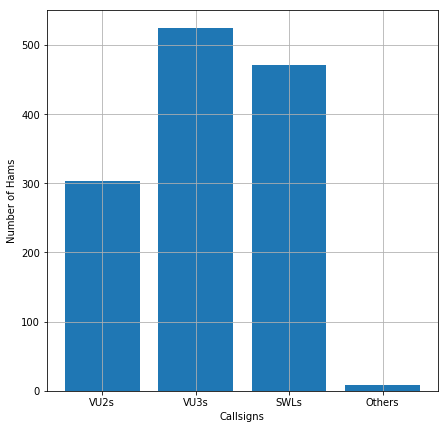

In [16]:
fig1,ax1 = plt.subplots()
ax1.bar(["VU2s","VU3s","SWLs","Others"],[vu2,vu3,SWL,len(calls)-vu2-vu3-SWL])
plt.xlabel("Callsigns")
plt.ylabel("Number of Hams")
fig1.set_figheight(7)
fig1.set_figwidth(7)
plt.grid(True)
plt.show()

In [17]:
cities = hams["City"]
cities = cities.replace(["BANGALORE","Bangalore","HYDERABAD","CHENNAI","MUMBAI","THIRUVANANTHAPURAM","KOLKATA"],
                        ["Bengaluru","Bengaluru","Hyderabad","Chennai","Mumbai","Thiruvananthapuram","Kolkata"])
print("         Top Cities: ")
print(cities.value_counts().head(20))

         Top Cities: 
Bengaluru             599
Chennai                42
Mumbai                 32
Hyderabad              27
Thiruvananthapuram     24
Kolkata                17
Pune                   14
Coimbatore             13
VIJAYAWADA             13
NELLORE                10
WEST GODAVARI           9
VELLORE                 8
KOLLAM                  8
SALEM                   7
TUMKUR                  7
Kalpetta                7
MADURAI                 7
USA                     7
Cochin                  6
Patna                   6
Name: City, dtype: int64
